# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.09000000171363354
Score (max over agents) from episode 2: 0.09000000171363354
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0


In [1]:
from unityagents import UnityEnvironment
import numpy as np
env = UnityEnvironment(file_name="Tennis_Linux/Tennis.x86_64")
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
num_agents = len(env_info.agents)
action_size = brain.vector_action_space_size
states = env_info.vector_observations
state_size = states.shape[1]

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


### 3.5 Insert code from external files to accelerate debugging

In [2]:
# utilities.py
import torch
import torch.nn.functional as F
import torch.distributed as dist
from torch.autograd import Variable
import numpy as np

###################################
# This file contains useful helper functions
# Most of it is taken from the MADDPG Lab of the Udacity Deep RL nanodegree
################################### 

def transpose_list(mylist):
    return list(map(list, zip(*mylist)))

def transpose_to_tensor(input_list):
    make_tensor = lambda x: torch.tensor(x, dtype=torch.float)
    return list(map(make_tensor, zip(*input_list)))

# https://github.com/ikostrikov/pytorch-ddpg-naf/blob/master/ddpg.py#L11
def soft_update(target, source, tau):
    """
    Perform DDPG soft update (move target params toward source based on weight
    factor tau)
    Inputs:
        target (torch.nn.Module): Net to copy parameters to
        source (torch.nn.Module): Net whose parameters to copy
        tau (float, 0 < x < 1): Weight factor for update
    """
    for target_param, param in zip(target.parameters(), source.parameters()):
        target_param.data.copy_(target_param.data * (1.0 - tau) + param.data * tau)

# https://github.com/ikostrikov/pytorch-ddpg-naf/blob/master/ddpg.py#L15
def hard_update(target, source):
    """
    Copy network parameters from source to target
    Inputs:
        target (torch.nn.Module): Net to copy parameters to
        source (torch.nn.Module): Net whose parameters to copy
    """
    for target_param, param in zip(target.parameters(), source.parameters()):
        target_param.data.copy_(param.data)

# https://github.com/seba-1511/dist_tuto.pth/blob/gh-pages/train_dist.py
def average_gradients(model):
    """ Gradient averaging. """
    size = float(dist.get_world_size())
    for param in model.parameters():
        dist.all_reduce(param.grad.data, op=dist.reduce_op.SUM, group=0)
        param.grad.data /= size

# https://github.com/seba-1511/dist_tuto.pth/blob/gh-pages/train_dist.py
def init_processes(rank, size, fn, backend='gloo'):
    """ Initialize the distributed environment. """
    os.environ['MASTER_ADDR'] = '127.0.0.1'
    os.environ['MASTER_PORT'] = '29500'
    dist.init_process_group(backend, rank=rank, world_size=size)
    fn(rank, size)

def onehot_from_logits(logits, eps=0.0):
    """
    Given batch of logits, return one-hot sample using epsilon greedy strategy
    (based on given epsilon)
    """
    # get best (according to current policy) actions in one-hot form
    argmax_acs = (logits == logits.max(1, keepdim=True)[0]).float()
    if eps == 0.0:
        return argmax_acs
    # get random actions in one-hot form
    rand_acs = Variable(torch.eye(logits.shape[1])[[np.random.choice(
        range(logits.shape[1]), size=logits.shape[0])]], requires_grad=False)
    # chooses between best and random actions using epsilon greedy
    return torch.stack([argmax_acs[i] if r > eps else rand_acs[i] for i, r in
                        enumerate(torch.rand(logits.shape[0]))])

# modified for PyTorch from https://github.com/ericjang/gumbel-softmax/blob/master/Categorical%20VAE.ipynb
def sample_gumbel(shape, eps=1e-20, tens_type=torch.FloatTensor):
    """Sample from Gumbel(0, 1)"""
    U = Variable(tens_type(*shape).uniform_(), requires_grad=False)
    return -torch.log(-torch.log(U + eps) + eps)

# modified for PyTorch from https://github.com/ericjang/gumbel-softmax/blob/master/Categorical%20VAE.ipynb
def gumbel_softmax_sample(logits, temperature):
    """ Draw a sample from the Gumbel-Softmax distribution"""
    y = logits + sample_gumbel(logits.shape, tens_type=type(logits.data))
    return F.softmax(y / temperature, dim=1)

# modified for PyTorch from https://github.com/ericjang/gumbel-softmax/blob/master/Categorical%20VAE.ipynb
def gumbel_softmax(logits, temperature=0.5, hard=False):
    """Sample from the Gumbel-Softmax distribution and optionally discretize.
    Args:
      logits: [batch_size, n_class] unnormalized log-probs
      temperature: non-negative scalar
      hard: if True, take argmax, but differentiate w.r.t. soft sample y
    Returns:
      [batch_size, n_class] sample from the Gumbel-Softmax distribution.
      If hard=True, then the returned sample will be one-hot, otherwise it will
      be a probabilitiy distribution that sums to 1 across classes
    """
    y = gumbel_softmax_sample(logits, temperature)
    if hard:
        y_hard = onehot_from_logits(y)
        y = (y_hard - y).detach() + y
    return y


In [3]:
# buffer.py
import random
from collections import namedtuple, deque
#import torch
#import numpy as np # Done above in JP Notebook
#from utilities import transpose_list

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Replay buffer as in previous projects and exercises.
# Adjusted to lists of lists as in MADDPG lab
class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed):
        """Initialize a ReplayBuffer object.

        Params
        ======
            action_size (int): dimension of each action
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
            seed (int): random seed
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
    
    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
    
    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).long().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
  
        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)


In [4]:
# OUNoise.py
#import numpy as np
#import torch


# from https://github.com/songrotek/DDPG/blob/master/ou_noise.py
class OUNoise:

    def __init__(self, action_dimension, scale=1.0, mu=0, theta=0.15, sigma=0.2):
        self.action_dimension = action_dimension
        self.scale = scale
        self.mu = mu 
        self.theta = theta
        self.sigma = sigma
        self.state = np.ones(self.action_dimension) * self.mu
        self.reset()

    def reset(self):
        self.state = np.ones(self.action_dimension) * self.mu

    def noise(self):
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.random.randn(len(x))
        self.state = x + dx
        return torch.tensor(self.state * self.scale).float()


In [5]:
# model.py
"""All imported above in JPNB
import numpy as np
import torch
"""
import torch.nn as nn
import torch.nn.functional as F

# According to lesson
def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)

# Similar to Deep Q-Network lecture exercise and the PyTorch extracurricular Content
class Actor(nn.Module):
    "Actor Network" 

    def __init__(self, state_size, action_size, seed, hidden_layers=[256,256]):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            state_size: integer, size of the input (e.g., state space)
            action_size: integer, size of the output layer (e.g., action space)
            seed (int): Random seed
            hidden_layers: list of integers, the sizes of the hidden layers
        '''
        super().__init__()
        self.seed = torch.manual_seed(seed)

        # Add the first layer, input to a hidden layer
        self.hidden_layers = nn.ModuleList([nn.Linear(state_size, hidden_layers[0])])
        #self.hidden_layers.extend([nn.BatchNorm1d(hidden_layers[0])])
        
        # Add a variable number of more hidden layers
        layer_sizes = zip(hidden_layers[:-1], hidden_layers[1:])
        self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])

        self.nonlin = F.selu
        
        self.output = nn.Linear(hidden_layers[-1], action_size)
        
    def forward(self, state):
        ''' Forward pass through the network, returns the action '''
        
        x = state
        # Forward through each layer in `hidden_layers`, with SELU activation
        for linear in self.hidden_layers:
            x = self.nonlin(linear(x))
    
        x = self.output(x)

        # Return an action probability
        return F.tanh(x)

# Similar to Deep Q-Network lecture exercise and the PyTorch extracurricular Content
class Critic(nn.Module):
    "Critic Network" 

    def __init__(self, state_size, action_size, seed, hidden_layers=[256,256]):
        ''' Builds a feedforward network with arbitrary hidden layers.
        
            Arguments
            ---------
            state_size: integer, size of the input (e.g., state space)
            action_size: integer, size of the output layer (e.g., action space)
            seed (int): Random seed
            hidden_layers: list of integers, the sizes of the hidden layers
        '''
        super().__init__()
        self.seed = torch.manual_seed(seed)

        if len(hidden_layers)==1:
            hidden_layers = [hidden_layers, hidden_layers]

        # Add the first layer, input to a hidden layer
        # For the critic, this is num_agents * (states)
        self.hidden_layers = nn.ModuleList([nn.Linear(state_size *1, hidden_layers[0])])
        # self.hidden_layers.extend([nn.BatchNorm1d(hidden_layers[0])])
        
        # Add second hidden layer, with actions as additional inputs
        self.hidden_layers.extend([nn.Linear(hidden_layers[0] + 2*action_size, hidden_layers[1])])

        if len(hidden_layers)>2:
            layer_sizes = zip(hidden_layers[1:-1], hidden_layers[2:])
            self.hidden_layers.extend([nn.Linear(h1, h2) for h1, h2 in layer_sizes])

        self.nonlin = F.selu
        
        self.output = nn.Linear(hidden_layers[-1], 1)
        
    def forward(self, state, action):
        ''' Forward pass through the network, returns the estimated value '''

        #print(f"Critic: state size {state.size()}")
        
        # State is input to first layer, convert everything to float
        x = self.nonlin(self.hidden_layers[0](state)).float()
        action = action.float()

        #print(f"x before cat: {x.size()}")
        x = torch.cat((x, action), dim=1)
        #print(f"x after cat: {x.size()}")
        x = self.nonlin(self.hidden_layers[1](x))


        # Forward through each layer in `hidden_layers`, with activation
        if len(self.hidden_layers)>2:
            for linear in self.hidden_layers[2:]:
                x = self.nonlin(linear(x))
    
        x = self.output(x)

        # Return the estimated value itself
        return x



In [6]:
# ddpg.py
"""Not needed in JPNB
import torch
"""
import torch.optim as optim
"""
import torch.nn.functional as F
import numpy as np
import random

from model import Actor, Critic
from utilities import hard_update, soft_update

from OUNoise import OUNoise
from buffer import ReplayBuffer
"""

LR_ACTOR = 1e-3               # Learning rate for the actor's optimizer
LR_CRITIC = 1e-3               # Learning rate for the critic's optimizer
TAU = 6e-2                    # Tau factor for soft update
GAMMA = 0.99            # Discount factor

BUFFER_SIZE = int(1e6)  # Replay buffer size
BATCH_SIZE = 128        # Minibatch size

WEIGHT_DECAY = 0#1e-5     # Weight decay for critic optimizer
UPDATE_EVERY = 1        # Update weights every {} time steps
N_UPDATES = 1           # Number of successive trainings

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class DDPGAgent:

    def __init__(self, state_size, action_size, seed, index=0):
        """Initialize an Agent object.
        
        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            seed (int): random seed
            index (int): Index assigned to the agent
        """

        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)
        self.action_limits = [-1,1]     # Min, Max of all action values
        self.index = index    # Index of this agent
        self.tau = TAU
        self.num_updates = N_UPDATES
        self.num_agents=2     # Number of agents in the environment
        self.tstep = 0          # Simulation step (module UPDATE_EVERY)
        self.gamma = GAMMA 

        self.actor_local = Actor(state_size, action_size, seed).to(device)
        self.critic_local = Critic(state_size, action_size, seed).to(device)
        self.actor_target = Actor(state_size, action_size, seed).to(device)
        self.critic_target = Critic(state_size, action_size, seed).to(device)

        self.noise = OUNoise(action_size, seed)

        # Initialize target networks
        hard_update(self.actor_target, self.actor_local)
        hard_update(self.critic_target, self.critic_local)

        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)

        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, seed)

    # act and act_targets similar to exercises and MADDPG Lab
    def act(self, state, noise=0.0):
        """Returns actions for given state as per current policy.
    
        Params
        ======
            state (array_like): current state
            noise (boolean):    control whether or not noise is added
        """
        # Uncomment if state is numpy array instead of tensor
        state = torch.from_numpy(state).float().to(device)
        # Put model into evaluation mode
        action = np.zeros(self.action_size)
        self.actor_local.eval()

        # Get actions for current state, transformed from probabilities
        with torch.no_grad():
            probs = self.actor_local(state) + noise*self.noise.noise() 

        # Put actor back into training mode
        self.actor_local.train()

        #  Transform probability into valid action ranges
        #act_min, act_max = self.action_limits
        #action = (act_max - act_min) * (probs - 0.5) + (act_max + act_min)/2
        return np.clip(probs, -1, 1)


    def act_targets(self, state, noise=0.0):
        """Returns actions for given state as per current target policy.
    
        Params
        ======
            state (array_like): current state
        """
        state = state.to(device)
        self.actor_target.eval()
        
        probs = self.actor_target(state) + noise*self.noise.noise() 

        #  Transform probability into valid action ranges
        return np.clip(action, -1, 1)

    def step(self, state, action, reward, next_state, done):
        """Save experience in replay memory, use random samples from buffer to learn.
        
        PARAMS
        ======
            state:      current state
            action:     taken action
            reward:     earned reward
            next_state: next state
            done:       Whether episode has finished
            TODO: add beta for prioritized experience replay
        """
        self.tstep += 1

        # Save experience in replay memory
        self.memory.add(state, action, reward, next_state, done)

        # Learn every UPDATE_EVERY time steps
        self.tstep = (self.tstep + 1 ) % UPDATE_EVERY

        # If UPDATE_EVERY and enough samples are available in memory, get random subset and learn
        if self.tstep == 0 and len(self.memory) > BATCH_SIZE:
            for _ in range(self.num_updates):
                experiences = self.memory.sample()
                self.learn(experiences)

    def learn(self, experiences):
        """Update value parameters using given batch of experience tuples. 
        Update according to 
            Q_targets = r + gamma * critic_target(next_state, actor_target(next_state))
        
        According to the lessons: 
            actor_target  (state)           gives   action
            critic_target (state, action)   gives   Q-value

        Params
        ======
            experiences (Tuple[torch.Variable]): tuple of (s, a, r, s', done) tuples 
            all_actions (Tuple[torch.Variable]): all actions 
            all_next_actions (Tuple[torch.Variable]): all next actions 
        """ 

        states, actions, rewards, next_states, dones = experiences

        next_actions = self.actor_target(next_states)
        # Select correct set of actions from all actions
        # e.g. 2 agents, action_size=2:
        # actions: [-1 1 -1 1]
        # agent0:  [-1 1]
        # agent1:       [-1 1]
        actions_agent = actions[:,self.index*self.num_agents:self.index*self.num_agents+self.action_size].float()

        # ------------------- update critic ------------------- #
        #print(f"Action in experiences: {actions.size()}")
        """
        if self.index == 0:
            next_actions = torch.cat((next_actions, actions_agent), dim=1).to(device)
        else:
            next_actions = torch.cat((actions_agent, next_actions), dim=1).to(device)
        """
        next_actions = torch.cat((actions_agent, next_actions), dim=1).to(device)
        
        # Predicted Q value from Critic target network
        with torch.no_grad():
            Q_targets_next = self.critic_target(next_states, next_actions)

        Q_targets = rewards + self.gamma * Q_targets_next * (1 - dones)
        Q_expected = self.critic_local(states,actions)
        
        # Compute critic loss
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        self.critic_optimizer.step()


        # ------------------- update actor ------------------- #
        actions_expected = self.actor_local(states)
        """
        if self.index == 0:
            actions_expected = torch.cat((actions_expected, actions_agent), dim=1)
        else: 
            actions_expected = torch.cat((actions_agent, actions_expected), dim=1)
        """
        actions_expected = torch.cat((actions_agent, actions_expected), dim=1)
        # Compute actor loss based on expectation from actions_expected
        actor_loss = -self.critic_local(states, actions_expected).mean()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()

        self.target_soft_update()
        
    def save(self, filename):
        """Saves the agent to the local workplace

        Params
        ======
            filename (string): where to save the weights
        """

        checkpoint = {'input_size': self.state_size,
              'output_size': self.action_size,
              'actor_hidden_layers': [each.out_features for each in self.actor_local.hidden_layers if each._get_name()!='BatchNorm1d'],
              'actor_state_dict': self.actor_local.state_dict(),
              'critic_hidden_layers': [each.out_features for each in self.critic_local.hidden_layers if each._get_name()!='BatchNorm1d'],
              'critic_state_dict': self.critic_local.state_dict()}

        torch.save(checkpoint, filename)


    def load_weights(self, filename):
        """ Load weights to update agent's actor and critic networks.
        Expected is a format like the one produced by self.save()

        Params
        ======
            filename (string): where to load data from. 
        """
        checkpoint = torch.load(filename)
        if not checkpoint['input_size'] == self.state_size:
            print(f"Error when loading weights from checkpoint {filename}: input size {checkpoint['input_size']} doesn't match state size of agent {self.state_size}")
            return None
        if not checkpoint['output_size'] == self.action_size:
            print(f"Error when loading weights from checkpoint {filename}: output size {checkpoint['output_size']} doesn't match action space size of agent {self.action_size}")
            return None
        my_actor_hidden_layers = [each.out_features for each in self.actor_local.hidden_layers if each._get_name()!='BatchNorm1d']
        if not checkpoint['actor_hidden_layers'] == my_actor_hidden_layers:
            print(f"Error when loading weights from checkpoint {filename}: actor hidden layers {checkpoint['actor_hidden_layers']} don't match agent's actor hidden layers {my_actor_hidden_layers}")
            return None
        my_critic_hidden_layers = [each.out_features for each in self.critic_local.hidden_layers if each._get_name()!='BatchNorm1d']
        if not checkpoint['critic_hidden_layers'] == my_critic_hidden_layers:
            print(f"Error when loading weights from checkpoint {filename}: critic hidden layers {checkpoint['critic_hidden_layers']} don't match agent's critic hidden layers {my_critic_hidden_layers}")
            return None
        self.actor_local.load_state_dict(checkpoint['actor_state_dict'])
        self.critic_local.load_state_dict(checkpoint['critic_state_dict'])


    def target_soft_update(self):
        """Soft update model parameters for actor and critic of all MADDPG agents.
        θ_target = τ*θ_local + (1 - τ)*θ_target
        """

        soft_update(self.actor_target, self.actor_local, self.tau)
        soft_update(self.critic_target, self.critic_local, self.tau)



In [7]:
# maddpg.py
"""imported above in JPNB
from ddpg import DDPGAgent
import torch
# import torch.nn as nn # Needed for grad clipping
import torch.nn.functional as F
import random
from utilities import soft_update, transpose_to_tensor
from buffer import ReplayBuffer
"""

GRAD_CLIPPING = 1.0     # For gradient clipping


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class MADDPG_Agent(): 
    def __init__(self, state_size, action_size, num_agents=2, seed=1):
        super(MADDPG_Agent, self).__init__()

        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(seed)

        self.num_agents = num_agents             # Two agents for tennis environment
        self.maddpg_agent = [DDPGAgent(self.state_size, self.action_size, seed, index=i) for i in range(self.num_agents)]

        self.tstep = 0


    def get_actors(self):
        """Get actual actors of all the agents in the MADDPG object"""
        actors = [ddpg_agent.actor_local for ddpg_agent in self.maddpg_agent]
        return actors

    def get_target_actors(self):
        """Get target actors of all the agents in the MADDPG object"""
        target_actors = [ddpg_agent.actor_target for ddpg_agent in self.maddpg_agent]
        return target_actors

    def act(self, states_all_agents, noise=0.0):
        """Get actions from all agents in the MADDPG object.

        Params
        ======
            states_all_agents (array-like): the states for each agent
            noise: the noise to apply
        """

        actions = []
        for agent, state in zip(self.maddpg_agent, states_all_agents):
            actions.append(agent.act(state,noise).numpy())
        # actions = [agent.act(state, noise).numpy() for agent, state in zip(self.maddpg_agent, states_all_agents)]
        # Transform from list to (1,numagents*action_size) ndarray
        actions = np.resize(np.asarray(actions, dtype=np.float32), (1,self.num_agents*self.action_size))
        return actions

    def act_targets(self, states_all_agents, noise=0.0):
        """Get actions by target networks from all agents in the MADDPG object.
Params
        ======
            states_all_agents (array-like): the states for each agent
            noise: the noise to apply
        """

        actions = [agent.act_targets(state, noise) for agent, state in zip(self.maddpg_agent, states_all_agents)]
        return actions

    def step(self, state, action, reward, next_state, done):
        """ Save experience in replay memory, and learn new target weights

        Params
        =====
            state:      current state
            action:     taken action
            reward:     earned reward
            next_state: next state
            done:       Whether episode has finished
        """
        # Increase t_step
        self.tstep += 1

        # Step for each agent
        for agent in self.maddpg_agent:
            state_agent = state[agent.index,:]
            #action_agent = action[agent.index]
            reward_agent = reward[agent.index]
            next_state_agent = next_state[agent.index,:]
            done_agent = done[agent.index]

            #TODO: Maybe add states & actions for all agents? --> Adjust model, as well
            agent.step(state_agent, action, reward_agent, next_state_agent, done_agent)

    def save(self, filename_root):
        """Saves the agent to the local workplace, one DDPG agent at a time

        Params
        ======
            filename_root (string): where to save the weights. Root name, to which 'agentX.pth' is appended. 
        """
        for i, agent in enumerate(self.maddpg_agent):
            filename_cur = f"{filename_root}_agent{i}.pth"
            agent.save(filename_cur)
    
    def load_weights(self, filename_root):
        """ Load weights to update agent's actor and critic networks.
        Expected is a format like the one produced by self.save()

        Params
        ======
            filename_root (string): where to load data from. Root name, to which 'agentX' is appended for each agent.
        """
        for i, agent in enumerate(self.maddpg_agent):
            filename_cur = f"{filename_root}_agent{i}.pth"
            agent.load_weights(filename_cur)


### 4. Setting up the Agent

We will set up an MADDPG agent:

In [8]:
#from maddpg import MADDPG_Agent
num_agents = 2
agent = MADDPG_Agent(state_size, action_size, num_agents)

In case there is already a weight file available from previous training runs, then we can load it via this function call:

In [ ]:
filename_root = 'checkpoint'
agent.load_weights(filename_root)

### 5. Training
In case no agent weights have been loaded, we need to train our agent.

In [ ]:
from collections import deque
import time
            
def maddpg(n_episodes=6000):
    """DDPG for solving reacher environment.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
    """
    scores = []                         # List containing scores from each episode
    moving_avgs = []
    WINDOW_SIZE=100
    scores_window = deque(maxlen=WINDOW_SIZE)   # Last 100 scores
    best_score = -np.inf       # For the absolute max value ever reached
    THRESH_SOLVED = 0.5
    solved = False                      # To keep track whether we already solved the environment
    aggregate_output = WINDOW_SIZE       # Number of episodes to display in one changing line
    
    NOISE_START = 4               # Scaling factor for noise
    NOISE_END = 0
    NOISE_PER_PERIOD = 1000     # Nominator for determining next iteration's noise

    noise_schedule = \
        lambda episode: max(NOISE_END, NOISE_START - episode * (NOISE_START - NOISE_END)/NOISE_PER_PERIOD)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # Reset the environment to train mode
        state = env_info.vector_observations               # Get initial state
        score = np.zeros(num_agents)                      # Reset scores
        noise_cur = noise_schedule(i_episode)                       # Reduce noise
        if (i_episode - 1) % aggregate_output == 0:
            start_time = time.time()
        
        while True: 
            actions = agent.act(state, noise=noise_cur)                 # Get action from actor
            #print(f"Actions: {actions}")
            #for i, ac in enumerate(actions):
                #actions[i] = np.clip(actions[i].detach(),-1,1).numpy()
                #actions = np.clip(actions, -1, 1).numpy()      # Clip it to valid range
            # actions_array = torch.stack(actions).detach().numpy()

            env_info = env.step(actions)[brain_name]       # Send action to the environment
            next_state = env_info.vector_observations      # Get the next state, ...
            reward = env_info.rewards                      # ..., reward ...
            done = env_info.local_done                     # ..., and whether the episode has finished 
            agent.step(state, actions, reward, next_state, done)  # Take one step, learn new weights via soft update
            state = next_state                             # Progress states 
            score += reward                                # Update score
            
            if np.any(done):
                break
        duration = time.time() - start_time
        scores.append(max(score))                               # Save most recent score
        scores_window.append(scores[-1])                        # Save most recent score
        if max(score)>best_score and max(score)>THRESH_SOLVED:
            print(f"\nNew highscore: \t{scores[-1]}")
            best_score = scores[-1]
        moving_avgs.append(np.mean(scores_window))
        
        # display some progress
        print('\rEpisode {} ({:.1f}s)\tAverage Max Score: {:.2f}, All-time best: {:.2f}'.format(\
                        i_episode, duration, moving_avgs[-1], best_score), end="")
        if i_episode% aggregate_output == 0:
            print('\rEpisode {} ({:.1f}s)\tAverage Max Score: {:.2f}, All-time best: {:.2f}'.format(\
                        i_episode, duration, moving_avgs[-1], best_score))
        
        if moving_avgs[-1] >= THRESH_SOLVED and i_episode>= WINDOW_SIZE and not solved:    # Only print "solved" if target score reached for the first time
            print("\nEnvironment solved in {:d} episodes!\tAverage Max Score: {:.2f}, All-time best: {.2f}".format
                 (i_episode - WINDOW_SIZE, moving_avgs[-1], best_score))
            solved = True
            answer = input("Should I continue training? [Y/n]")  # Give the user the possibility to cancel further training
            if answer.lower()=='n':
                break
    return scores, moving_avgs


# Train agent and keep track of the scores
if 'scores' in locals():
    # Append if scores already exist, adjust epsilon to final value
    new_scores, new_moving_avgs = maddpg(n_episodes=100) 
    scores.append(new_scores)
    moving_avgs.append(new_moving_avgs)
else: 
    # No scores have been generated, so start training all over, again
    scores, moving_avgs = maddpg()

Episode 100 (72.8s)	Average Max Score: 0.00, All-time best: -inf
Episode 200 (92.4s)	Average Max Score: 0.01, All-time best: -inf
Episode 300 (98.9s)	Average Max Score: 0.01, All-time best: -inf
Episode 400 (81.4s)	Average Max Score: 0.01, All-time best: -inf
Episode 500 (93.9s)	Average Max Score: 0.02, All-time best: -inf
Episode 600 (98.6s)	Average Max Score: 0.03, All-time best: -inf
Episode 700 (110.4s)	Average Max Score: 0.04, All-time best: -inf
Episode 800 (99.8s)	Average Max Score: 0.03, All-time best: -inf
Episode 900 (108.6s)	Average Max Score: 0.04, All-time best: -inf
Episode 1000 (105.6s)	Average Max Score: 0.04, All-time best: -inf
Episode 1100 (97.8s)	Average Max Score: 0.03, All-time best: -inf
Episode 1200 (104.3s)	Average Max Score: 0.03, All-time best: -inf
Episode 1300 (95.9s)	Average Max Score: 0.03, All-time best: -inf
Episode 1400 (95.2s)	Average Max Score: 0.03, All-time best: -inf
Episode 1500 (112.7s)	Average Max Score: 0.05, All-time best: -inf
Episode 1600 (

NameError: name 'moving_avgs' is not defined

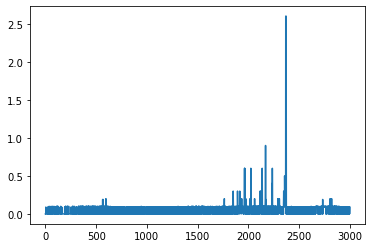

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='DDPG')
plt.plot(np.arange(len(scores)), moving_avgs, c='r', label='Moving AVG')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left')
plt.show()

When finished, we should close the environment.

In [4]:
env.close()